Previewing Goldhirsh Data

## Build Dataframes

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Organizations Dataset

In [ ]:
file_path_org = '/content/drive/MyDrive/My Goldhirsh Data/organizations-new.json'
df_org = pd.read_json(file_path_org)
print(df_org.columns)
print(df_org.isnull().sum())
print(df_org.shape)
df_org.head()

Index(['slug', 'type', 'website', 'instagram', 'twitter', 'facebook',
       'newsletterLink', 'title', 'ein', 'zipcode', 'volunteerLink', 'summary',
       'category'],
      dtype='object')
slug                 0
type                 0
website              1
instagram            0
twitter              0
facebook             2
newsletterLink    2059
title                0
ein                  2
zipcode            309
volunteerLink     2109
summary              0
category            48
dtype: int64
(2634, 13)


,slug,type,website,instagram,twitter,facebook,newsletterLink,title,ein,zipcode,volunteerLink,summary,category
0,lact-los-angeles-community-theatre,Nonprofit,https://www.losangelescommunitytheatre.org,,LACT2050,Paul3930?fref=ts,None,LACT - Los Angeles Community Theatre,,90031,None,We build community through theatre.,Arts & cultural vitality
1,dharma-health-institute,For profit business,https://www.dharmahealthinstitute.com,dharmahealthinstitute,DharmaHealthLA,dharmahealthinstitute,None,Dharma Health Institute,954116679,90036,None,DIY Girls’ mission is to increase girls’ inter...,Health
2,the-story-project,Nonprofit,https://www.storyproject.org,,storyprojectLA,The-Story-Project-116216105118265timeline/,None,The Story Project,954684376,90036,None,The Story Project encourages at-risk youth in ...,Education & youth
3,first-place-for-youth,Nonprofit,https://firstplaceforyouth.org,FirstPlaceforYouth,FPFY,firstplaceforyouth,https://firstplaceforyouth.org,First Place for Youth,,,None,First Place provides foster youth with intensi...,Education & youth
4,pvjobs,Non-profit organization with independent 501(c...,https://www.pvjobs.org,PVJOBSLA,pvjobsla,PVJOBS,None,PVJOBS,954706948,None,None,PVJOBS is a nonprofit 501©3 public benefit cor...,


slug                 0
type                 0
website              1
instagram            0
twitter              0
facebook             2
newsletterLink    2059
title                0
ein                  2
zipcode            309
volunteerLink     2109
summary              0
category             0
dtype: int64


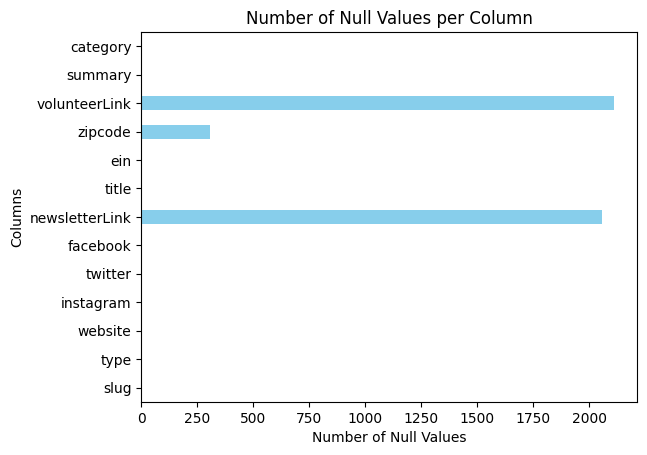

In [ ]:
# To check for missing values
missing_vals_org = df_org.isnull().sum()
print(missing_vals_org)

# Create a horizontal bar plot
missing_vals_org.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Number of Null Values per Column')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')

# Show plot
plt.show()



In [ ]:
print(df_org['category'].unique())
print(df_org['category'])

['Arts & cultural vitality' 'Health' 'Education & youth' ''
 'Social connectedness' 'Income & employment'
 'Environmental quality & sustainability' 'Public safety & public space'
 'Mobility' nan 'Housing & homelessness']
0       Arts & cultural vitality
1                         Health
2              Education & youth
3              Education & youth
4                               
                  ...           
2629                            
2630                            
2631                            
2632                            
2633                            
Name: category, Length: 2634, dtype: object


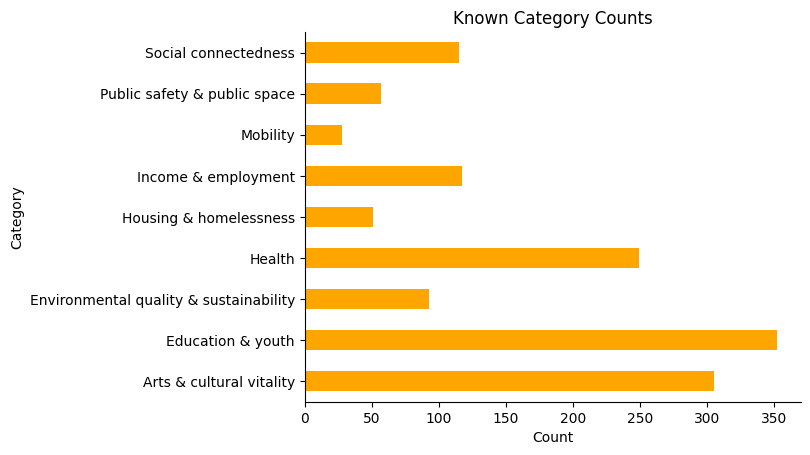

In [ ]:
# Ensure 'Unknown' is assigned to missing or empty categories
df_org['category'] = df_org['category'].fillna('Unknown').replace('', 'Unknown')

# Drop rows with the 'Unknown' category
df_filtered = df_org[df_org['category'] != 'Unknown']

# Step 2: Group by 'category' and count
category_counts = df_filtered.groupby('category').size()

# Step 3: Plot the horizontal bar plot
category_counts.plot(
    kind='barh',
    color='orange'
)

# Step 4: Aesthetic adjustments
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Known Category Counts")
plt.show()

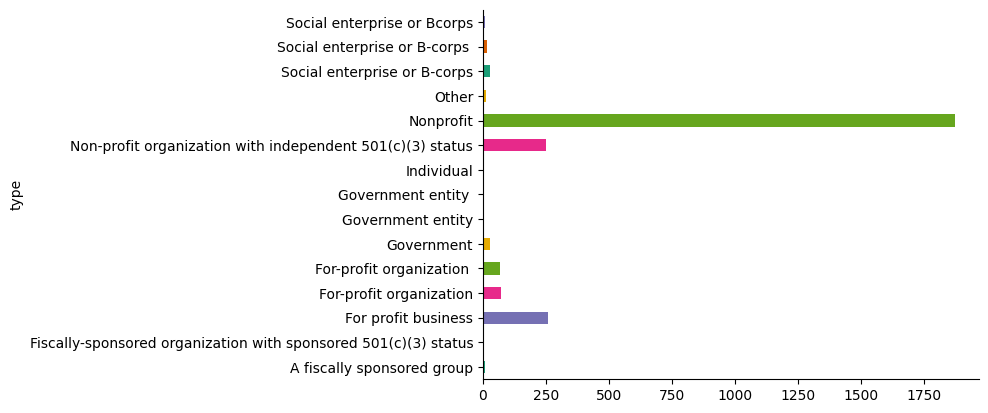

In [ ]:
# Group by Type
df_org.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# To see top 10 most/least common words

# Combine all text data from the selected column into a single string
from collections import Counter
import re
all_text = 'summary'.join(df_org['summary'])

# Tokenize the text into words (lowercase and remove non-alphabetic characters)
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Convert the counter object to a DataFrame for easy sorting
word_count_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by the frequency count
word_count_df = word_count_df.sort_values(by='count', ascending=False)

# Top 40 most common words
print("Top 40 Most Common Words:")
print(word_count_df.head(40))

# Top 10 least common words
print("\nTop 10 Least Common Words:")
print(word_count_df.tail(10))

Top 40 Most Common Words:
            word  count
15           and   6737
9             to   4652
48           the   4212
107           of   3140
12            in   2266
74             a   2264
8             is   1724
86           for   1516
2      community   1024
25          with   1015
0             we    998
192          our    954
21          that    927
132           by    884
7        mission    831
3        through    778
118            s    755
57         their    702
251      angeles    595
99           los    589
40   communities    572
38         youth    515
147           as    505
122    education    478
18            on    475
156          are    442
135       people    441
32    summarythe    415
385           an    407
378           la    395
136          all    381
28       support    368
50          arts    357
233     students    333
433         have    331
36            at    328
395       social    320
758         from    320
352     programs    319
198       heal

## Ideas Datasets (2013 to 2024)

In [ ]:
file_path_2013 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2013-new.json'
df_2013 = pd.read_json(file_path_2013)
print(df_2013.shape)
df_2013.head()

(275, 12)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,How will your project benefit Los Angeles?,What would success look like in the year 2050 regarding your indicator?,Please identify any partners or collaborators who will work with you on this project.,What are some of your organization’s most important achievements to date?,Please explain how you will evaluate your project. How will you measure success?
0,BelongLA — Engaging Angelenos to connect share...,2013/belongla-engaging-angelenos-to-connect-sh...,2013,Children's Bureau of Southern California,How do you belong? Belonging is the deepest se...,NaN,Submitted,The pioneering work of Belong with its develop...,Success in 2050 for Social Connectedness would...,Children’s Bureau has engaged 75 public and pr...,"For over 100 years, Children’s Bureau has been...",The Magnolia Community Initiative currently me...
1,Dodgeball Prosperity and the Common Good,2013/dodgeball-prosperity-and-the-common-good,2013,Eagle Rock Yacht Club,"During our journey, The Yacht Club has seeming...",NaN,Submitted,We believe a more physically active Los Angele...,"By 2050, we hope that there will be a drastic ...",LA Department of Recreation & Parks:,"To date, The Yacht Club has successfully trans...",Currently our growth and success is built on w...
2,Dream Resource Center,2013/dream-resource-center,2013,UCLA Labor Center,"This year, the Dream Resource Center (DRC), wi...",NaN,Submitted,Los Angeles will benefit from higher rates of ...,"In 2050, Los Angeles will embrace the rich imm...",Los Angeles Unified School District; United We...,"In the last several years, the UCLA Labor Cent...",The Dream Resource Center will evaluate our ou...
3,Craft Services,2013/craft-services,2013,Participlay,A mobile arts and crafting unit that visits ta...,NaN,Submitted,"The fact is that the arts foster creativity, i...","Success would look like that schools, families...","LA's Best After School Enrichment, Mario Davila","-TEDxUSC at The Stevens School of Innovation, ...",We will evaluate our initiative and measure th...
4,Backyard Homes: Sustainable Flexible Affordabl...,2013/backyard-homes-sustainable-flexible-affor...,2013,cityLAB-UCLA,"cityLAB proposes to build, study, and publicly...",NaN,Submitted,Backyard Homes will benefit Los Angeles by mak...,"In 2050, if Backyard Homes had spread to just ...",The project will be undertaken by the internat...,"cityLAB, a research center at UCLA’s School of...",We propose to build a demonstration prototype ...


In [ ]:
file_path_2014 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2014-new.json'
df_2014 = pd.read_json(file_path_2014)
print(df_2014.shape)
df_2014.head()

(266, 31)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,What two lessons have informed your solution or project?,Explain how implementing your project within the next twelve months is an achievable goal.,Please list at least two major barriers/challenges you anticipate. What is your strategy for ensuring a successful implementation?,...,How will your project impact the LA2050 LEARN metrics?,Please elaborate on how your project will impact the above metrics.,How will your idea/project help make LA the best place to CREATE today? In 2050?,How will your project impact the LA2050 CREATE metrics?,How will your project impact the LA2050 LIVE metrics?,How will your idea/project help make LA the best place to LIVE today? In 2050?,How will your idea/project help make LA the best place to CONNECT today? In 2050?,How will your project impact the LA2050 CONNECT metrics?,How will your project impact the LA2050 PLAY metrics?,How will your idea/project help make LA the best place to PLAY today? In 2050?
0,FLY Yoga Arts: Enhancing LAUSD Arts Education ...,2014/fly-yoga-arts-enhancing-lausd-arts-educat...,2014,FLY Yoga Arts,FLY will bring in depth training in Arts Instr...,LEARN,Submitted,The two greatest lessons that propelled me bui...,FLY is already partnered with many LAUSD schoo...,The first foreseeable barrier will be placing ...,...,Academic Performance Index scores,"With Arts funding declining, FLY has created a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LA has HEART,2014/la-has-heart,2014,Hollywood HEART,The LA has HEART initiative seeks to connect p...,CREATE,Submitted,::,Implementing this project within the next twel...,::,...,NaN,"In a recent article, ""How to Save our Schools""...",Our initiative will benefit at-risk youth with...,Employment in creative industries,NaN,NaN,NaN,NaN,NaN,NaN
2,L.A.W.N. Los Angeles Water Network: A digital ...,2014/l-a-w-n-los-angeles-water-network-a-digit...,2014,"Mia Lehrer + Associates, LA-Mas, Arid Lands In...",This app will educate the public about water c...,LIVE,Submitted,We have seen lots of organizations work to hel...,The test pilot is achievable as Arid Lands Ins...,Major challenges include:,...,NaN,This app will help LA increase our local water...,NaN,NaN,Exposure to air toxins,Drought has always been a significant problem ...,NaN,NaN,NaN,NaN
3,Center for Sustainable Communities in Compton CA,2014/center-for-sustainable-communities-in-com...,2014,Neighborhood Housing Services of Los Angeles C...,"Turning an abandoned, blighted grocery store i...",CREATE,Submitted,Achieving sustainability and building resilien...,NHS secured the Center property in March 2014 ...,Though we have adequate funds in hand to meet ...,...,NaN,Our expected outcomes will make a vital differ...,As low income communities in South LA continue...,Employment in creative industries,NaN,NaN,NaN,NaN,NaN,NaN
4,R5Y7: bici destino,2014/r5y7-bici-destino,2014,Bicycle Culture Institute,A solar powered vintage trailer 'pop up' bike ...,CREATE,Submitted,R5Y7: a bicycle gallery at 4357 Melrose Avenue...,Trailer: The highly modular and completely cus...,Fundraising additional funds.,...,NaN,In cities all over the world there is a patter...,Bicycles & Art make life better. R5Y7: bici de...,Employment in creative industries,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_path_2015 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2015-new.json'
df_2015 = pd.read_json(file_path_2015)
print(df_2015.shape)
df_2015.head()

(296, 20)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,Describe in greater detail how you will make LA the best place to LEARN.,In what areas of Los Angeles will you be directly working?,How do you plan to use these resources to make change?,Please explain how you will evaluate your work.,How will your proposal improve the following LEARN metrics?​,How can the LA2050 community and other stakeholders help your proposal succeed,How will your proposal improve the following LIVE metrics?​,How will your proposal improve the following CONNECT metrics?​,Describe in greater detail how you will make LA the best place to CONNECT.,Describe in greater detail how you will make LA the best place to PLAY.,How will your proposal improve the following PLAY metrics?​,How will your proposal improve the following CREATE metrics?​,Describe in greater detail how you will make LA the best place to CREATE.
0,Giving Students Power Over Numbers and Power O...,2015/giving-students-power-over-numbers-and-po...,2015,"Ironbox Education, Inc.",Chronic low achievement in math has been a maj...,LEARN,Submitted,Ironbox Education was founded by Dr. Randy Pal...,County of Los Angeles,Engage residents and stakeholders,Educational researchers explain that assessmen...,Percent of community college students completi...,Money (financial capital),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helping Los Angeles Youth Make Healthy Decisio...,2015/helping-los-angeles-youth-make-healthy-de...,2015,Planned Parenthood Los Angeles (PPLA),"Now more than ever, PPLA is working to empower...",LIVE,Submitted,NaN,Central LA,Conduct research,PPLA will work to increase knowledge related t...,NaN,Money (financial capital),Healthcare access,NaN,NaN,NaN,NaN,NaN,NaN
2,The CoachArt Student/Coach Matching App,2015/the-coachart-student-coach-matching-app,2015,CoachArt,The CoachArt Matching App will modernize the w...,CONNECT,Submitted,NaN,NaN,Conduct research,CoachArt recently launched a new performance e...,NaN,Money (financial capital),NaN,Rates of volunteerism,Los Angeles is booming. From the re-emergence ...,NaN,NaN,NaN,NaN
3,TMPST Action Parks provide creative movement t...,2015/tmpst-action-parks-provide-creative-movem...,2015,Tempest Action Parks,TMPST Action Parks are uniquely designed to br...,PLAY,Submitted,NaN,San Fernando Valley,Conduct research,Our work will be evaluated through our already...,NaN,Money (financial capital),NaN,NaN,NaN,Just like any other fast growing individual an...,Access to open space and park facilities,NaN,NaN
4,Inspiring Girls in Technology Entrepreneurship,2015/inspiring-girls-in-technology-entrepreneu...,2015,Iridescent,Offer the opportunity to young girls to develo...,CREATE,Submitted,NaN,NaN,Engage residents and stakeholders,"All participants, mentors, teachers and studen...",NaN,Money (financial capital),NaN,NaN,NaN,NaN,NaN,Number of high growth startups,Technovation gives girls the opportunity to cr...


In [ ]:
file_path_2016 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2016-new.json'
df_2016 = pd.read_json(file_path_2016)
print(df_2016.shape)
df_2016.head()

(288, 22)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,Please describe your project proposal.,Describe in greater detail how your proposal will make LA the best place to CREATE?,Please explain how you will define and measure success for your project.​,...,In what areas of Los Angeles will you be directly working?,Are any other organizations collaborating on this proposal?,Describe in greater detail how your proposal will make LA the best place to LEARN?,Which of the LEARN metrics will your proposal impact?​,Describe in greater detail how your proposal will make LA the best place to CONNECT?,Which of the CONNECT metrics will your proposal impact?​,Which of the LIVE metrics will your proposal impact?​,Describe in greater detail how your proposal will make LA the best place to LIVE?,Which of the PLAY metrics will your proposal impact?​,Describe in greater detail how your proposal will make LA the best place to PLAY?
0,Shared Space for Community Engaged Creative Pr...,2016/shared-space-for-community-engaged-creati...,2016,Cornerstone Theater Company,Cornerstone envisions a home that provides a s...,CREATE,Submitted,Building a coalition of practitioners from dif...,We envision a home that provides a shared spac...,Cornerstone has a culture of rigorous evaluation.,...,Central LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Represent: FREE acting & media arts school for...,2016/represent-free-acting-and-media-arts-scho...,2016,Represent,"A FREE, LA-based, acting & media arts school f...",CREATE,Submitted,Represent will create Represent School of Acti...,Represent School of Acting & Media Arts (RSAMA...,Represent School of Acting & Media Arts will w...,...,County of Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Empower low income youth to break out of the p...,2016/empower-low-income-youth-to-break-out-of-...,2016,Youth Business Alliance,Connect at risk and disadvantaged youth to lif...,LEARN,Submitted,We believe that every child deserves exposure ...,NaN,We will evaluate our work through:,...,Central LA,Alliance Patti & Peter Neuwirth Leadership Aca...,The Youth Business Alliance (YBA) is a 501(c)(...,College completion,NaN,NaN,NaN,NaN,NaN,NaN
3,'PEOPLE IN ME' Interactive Cyber Mural,2016/people-in-me-interactive-cyber-mural,2016,METRO Charter Elementary School,"A student-created interactive, cyber-video mur...",CONNECT,Submitted,"PEOPLE IN ME is a student-created, interactive...",NaN,1) Tabulate the number of visitors that view t...,...,Downtown L.A. metro area,"METRO Charter Elementary, A multi-disciplinary...",NaN,NaN,PEOPLE IN ME is aligned with METRO's emphasis ...,Cultural events,NaN,NaN,NaN,NaN
4,College Track: Developing purpose-driven leade...,2016/college-track-developing-purpose-driven-l...,2016,College Track,College Track’s Dream LA project empowers stud...,LEARN,Submitted,College Track’s Dream LA project will transfor...,NaN,College Track’s Dream LA project aims to 1) he...,...,East LA,NaN,College Track will make LA the best place to l...,College completion,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_path_2018 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2018-new.json'
df_2018 = pd.read_json(file_path_2018)
print(df_2018.shape)
df_2018.head()

(140, 28)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,How will your activation mobilize Angelenos?​,How will your activation engage Angelenos to make LA the best place to LIVE​,Please explain how you will define and measure success for your activation.​,...,Describe in greater detail how your activation will make LA the best place to CONNECT?​,Which of the CREATE metrics will your activation impact?​,Describe in greater detail how your activation will make LA the best place to CREATE?​,How will your activation engage Angelenos to make LA the best place to CREATE​,How will your activation engage Angelenos to make LA the best place to LEARN​,Which of the LEARN metrics will your activation impact?​,Describe in greater detail how your activation will make LA the best place to LEARN?​,Which of the PLAY metrics will your activation impact?​,How will your activation engage Angelenos to make LA the best place to PLAY​,Describe in greater detail how your activation will make LA the best place to PLAY?​
0,YouthCare - Intergenerational Respite Care,2018/youthcare-intergenerational-respite-care,2018,The Youth Movement Against Alzheimer's,YouthCare is the most affordable intergenerati...,LIVE,Honorable Mention,Trainings and/or in-person engagements,Our program provides positive benefits for Ang...,Our program addresses three key demographics: ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Root down! Rise up!,2018/root-down-rise-up,2018,Multicultural Communities for Mobility,“Root down! Rise up!” uses popular education a...,CONNECT,Submitted,Trainings and/or in-person engagements,NaN,Our achievable goals for the duration of this ...,...,Root down! Rise up! will seek to establish a m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Farmers Market Delivery,2018/farmers-market-delivery,2018,Natch,We make it easier for all Angelinos to sell or...,CREATE,Submitted,Encourage businesses to change practices,NaN,2 metrics: how many shops have been created in...,...,NaN,Employment in the creative industries,Creators in Los Angeles have never struggled i...,"Historically, economically underprivileged com...",NaN,NaN,NaN,NaN,NaN,NaN
3,Imagine. Recruit. Transform. Inspire.,2018/imagine-recruit-transform-inspire,2018,City Year Los Angeles,City Year Los Angeles connects Angelenos acros...,CONNECT,Submitted,Connect Angelenos with impactful volunteer opp...,NaN,Evaluation and data are at the heart of our wo...,...,Los Angeles is a city filled to bursting with ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SeedLA: Empowering Environmental Leadership,2018/seedla-empowering-environmental-leadership,2018,SeedLA,SeedLA is a group of professionals from differ...,LIVE,Submitted,Advocate for policy,SeedLA will make Los Angeles the best place to...,SeedLA defines the success of our project base...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_path_2019 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2019-new.json'
df_2019 = pd.read_json(file_path_2019)
print(df_2019.shape)
df_2019.head()

(155, 22)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,Which of the PLAY metrics will your submission impact?​​,In which areas of Los Angeles will you be directly working?​,In what stage of innovation is this project?​,...,Please explain how you will define and measure success for your project.​,How will your project make LA the best place to LIVE?,Which of the LIVE metrics will your submission impact?​​,Please list the organizations collaborating on this proposal.,Which of the CREATE metrics will your submission impact?​​,How will your project make LA the best place to CREATE?,Which of the CONNECT metrics will your submission impact?​​,How will your project make LA the best place to CONNECT?,Which of the LEARN metrics will your submission impact?​​,How will your project make LA the best place to LEARN?
0,Grand Park Rangers Expeditions,2019/grand-park-rangers-expeditions,2019,Los Angeles County Grand Park Foundation,Marketing technical support to enhance awarene...,PLAY,Submitted,Access to open space and park facilities,Central LA,Post-pilot (testing an expansion of concept af...,...,All that go through the Grand Park Rangers pro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Community Air Quality Monitoring,2019/community-air-quality-monitoring,2019,Safecast (Momoko Ito Foundation),Following on our previous air quality monitori...,LIVE,Submitted,NaN,County of Los Angeles,Expand existing program (expanding and continu...,...,We push for open source standards and greater ...,"Accessible, reliable environmental data is vit...",Exposure to air toxins,Los Angeles Public Library,NaN,NaN,NaN,NaN,NaN,NaN
2,Empowering Angelenos to build a path out of po...,2019/empowering-angelenos-to-build-a-path-out-...,2019,One Degree,Low-income and at-risk Angelenos will be able ...,LIVE,Submitted,NaN,County of Los Angeles,Expand existing program (expanding and continu...,...,We will measure success by how many L.A. Count...,Low-income families spend as many as 20 hours ...,Access to healthy food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CREATING CLOTHING FROM TRASH,2019/creating-clothing-from-trash,2019,EVERYBODY.WORLD,EVERYBODY.WORLD is creating exciting new texti...,CREATE,Finalist,NaN,Central LA,Expand existing program (expanding and continu...,...,Success for EVERYBODY.WORLD would be to launch...,NaN,NaN,NaN,Manufacturing activity,The first step to executing this groundbreakin...,NaN,NaN,NaN,NaN
4,Making L.A. a Friendlier City,2019/making-l-a-a-friendlier-city,2019,Mighty Companions,"We all want L.A. to be a friendlier place, and...",CONNECT,Submitted,NaN,City of Los Angeles,Lateral application (testing feasibility of a ...,...,"Informally, we will notice our fellow Angelino...",NaN,NaN,NaN,NaN,NaN,Adults getting sufficient social & emotional s...,"In a theater, for example, before the movie st...",NaN,NaN


In [ ]:
file_path_2020 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2020-new.json'
df_2020 = pd.read_json(file_path_2020)
print(df_2020.shape)
print(df_2020.columns)
print(df_2020.isnull().sum())
df_2020.head()

(284, 26)
Index(['title', 'slug', 'yearSubmitted', 'organization', 'summary', 'goal',
       'projectRanking',
       'Approximately how many people will be impacted by this proposal?​',
       'Which of the PLAY metrics will your submission impact?​',
       'Are there any other LA2050 goal categories that your proposal will impact?​',
       'In what stage of innovation is this project?',
       'Please explain how you will define and measure success for your project.',
       'Which of LA2050’s resources will be of the most value to you?​',
       'In which areas of Los Angeles will you be directly working?',
       'If you are submitting a collaborative proposal, please describe the specific role of partner organizations in the project.',
       'What is the need you’re responding to?',
       'Why is this project important to the work of your organization?​',
       'Please describe the broader impact of your proposal.',
       'Which of the LEARN metrics will your submission impa

,title,slug,yearSubmitted,organization,summary,goal,projectRanking,Approximately how many people will be impacted by this proposal?​,Which of the PLAY metrics will your submission impact?​,Are there any other LA2050 goal categories that your proposal will impact?​,...,Why is this project important to the work of your organization?​,Please describe the broader impact of your proposal.,Which of the LEARN metrics will your submission impact?​,Which of the LIVE metrics will your submission impact?​,Which of the CREATE metrics will your submission impact?​,Has your proposal changed due to COVID-19?,Please list the organizations collaborating on this proposal.,Which of the CONNECT metrics will your submission impact?​,Approximately how many people will be impacted by this proposal?,Why is this project important to the work of your organization?
0,Endless Summer Surf Camp,2020/endless-summer-surf-camp,2020,Malibu Foundation,We aim to establish an annual summer surf camp...,PLAY,Submitted,Direct Impact: 200,Youth sports participation,LA is the best place to CONNECT,...,Our goal as an organization is to create a res...,"The ocean stimulates our physical, mental, spi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Inner-City Arts: Virtual Arts Education Project,2020/inner-city-arts-virtual-arts-education-pr...,2020,Inner-City Arts,Through a major expansion of our in-school pro...,LEARN,Submitted,"Direct Impact: 15,000",NaN,LA is the best place to CREATE,...,Inner-City Arts has been partnering with LAUSD...,Our project’s intended population are students...,Arts education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SoCal 350,2020/socal-350,2020,SoCal 350,"With this grant, we seek to enhance our outrea...",LIVE,Submitted,"Direct Impact: 580,000",NaN,LA is the best place to LEARN,...,"As climate change activists, our group of volu...",Individuals who call LA county home deserve ac...,NaN,Air quality,NaN,NaN,NaN,NaN,NaN,NaN
3,Good Life Manufacturing,2020/good-life-manufacturing,2020,Lost Angels Children's Project,LACP respectfully request support for Good Lif...,CREATE,Winner,Direct Impact: 30,NaN,LA is the best place to LEARN,...,"Since 2014, LACP has provided vocational train...",Good Life Mfg. is expected to have a positive ...,NaN,NaN,Manufacturing activity,Lost Angels Children’s Project (LACP) is honor...,NaN,NaN,NaN,NaN
4,Young Adult Food Security Initiative,2020/young-adult-food-security-initiative,2020,Young Invincibles,Young adults in Los Angeles face persistent in...,LIVE,Submitted,"Direct Impact: 1,000",NaN,LA is the best place to LEARN,...,YI is a leader promoting expanded health cover...,Following proven models of success driving ben...,NaN,Access to healthy food,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_path_2021 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2021-new.json'
df_2021 = pd.read_json(file_path_2021)
print(df_2021.shape)
print(df_2021.isnull().sum())
print(df_2021.columns)
df_2021.head()

(320, 21)
title                                                                                                                                           0
slug                                                                                                                                            0
yearSubmitted                                                                                                                                   0
organization                                                                                                                                    0
summary                                                                                                                                         0
goal                                                                                                                                            0
projectRanking                                                                                                    

,title,slug,yearSubmitted,organization,summary,goal,projectRanking,"Describe the project, program, or initiative that this grant will support to address the problem identified.","In what stage of innovation is this project, program, or initiative?","What evidence do you have that this project, program, or initiative is or will be successful, and how will you define and measure success?",...,Indicate any additional LA2050 goals your project will impact.,In which areas of Los Angeles will you be directly working?,Describe how Los Angeles County will be different if your work is successful.,"Approximately how many people will be impacted by this project, program, or initiative?",Which of the LIVE metrics will you impact?​,Which of the CONNECT metrics will you impact?​,Describe the role of collaborating organizations on this project.,Which of the LEARN metrics will you impact?​,Which of the PLAY metrics will you impact?​,Which of the CREATE metrics will you impact?​
0,SAFE House: Survivors Are Free of Exclusion,2021/safe-house-survivors-are-free-of-exclusion,2021,Voices Beyond Assault,"Voices Beyond Assault seeks to provide a SAFE,...",LIVE,Submitted,This would be a novel survivor-centered empowe...,"Pilot or new project, program, or initiative",VBA plans to define and measure the success of...,...,LA is the best place to LEARN,Central LA,"The number of rapes reported in Los Angeles, C...",Direct Impact: 250,Healthcare access,NaN,NaN,NaN,NaN,NaN
1,The Beautify LA Community Grant Program,2021/the-beautify-la-community-grant-program,2021,"City of LA, Office of Community Beautification...",The Beautify LA Community Grant Program is an ...,CONNECT,Submitted,LA2050 will help us amplify the grant program ...,"Expand existing project, program, or initiative",Despite the elimination of previously funded g...,...,LA is the best place to CREATE,City of Los Angeles,LA County will enjoy an increase of beautiful ...,"Direct Impact: 500,000",NaN,Government responsiveness to residents’ needs,NaN,NaN,NaN,NaN
2,"Music and Dance for at-risk, low-income childr...",2021/music-and-dance-for-at-risk-low-income-ch...,2021,Boys & Girls Clubs of Venice,BGCV is partnering with Boys & Girls Clubs of ...,LEARN,Submitted,The requested funds will support an expansion ...,"Expand existing project, program, or initiative",The BGCV/BGCMLA Music program will provide opp...,...,NaN,Central LA,"Long-term, we are creating opportunities for u...",Direct Impact: 500,NaN,NaN,"BGCMLA will recruit participants, provide spac...",Arts education,NaN,NaN
3,Sail Away Weekends,2021/sail-away-weekends,2021,Los Angeles Maritime Institute,LAMI’s Sail Away Weekends provide at no charge...,PLAY,Submitted,Sail Away Weekends Program invites families of...,Applying a proven model or solution to a new i...,LAMI's Sail Away Weekends Program and its goal...,...,LA is the best place to LEARN,County of Los Angeles,The trauma felt by family members of murder vi...,Direct Impact: 160,NaN,NaN,Justice For Murdered Children has more than 30...,NaN,Prevalence of trauma and adverse childhood exp...,NaN
4,Build CA's Largest Public Kids' Makerspace,2021/build-ca-s-largest-public-kids-makerspace,2021,reDiscover Center,"Envision a 4,000 sf makerspace designed just f...",LEARN,Submitted,reDiscover develops the creative potential of ...,"Expand existing project, program, or initiative","This expansion into a 4,000 sf makerspace will...",...,LA is the best place to CREATE,Central LA,"Our vision is to facilitate 20,000 children pe...","Direct Impact: 20,000",NaN,NaN,NaN,Arts education,NaN,NaN


In [ ]:
file_path_2022 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2022-new.json'
df_2022 = pd.read_json(file_path_2022)
print(df_2022.shape)
print(df_2022.columns)
print(df_2022.isnull().sum())
df_2022.head()

(479, 17)
Index(['title', 'slug', 'yearSubmitted', 'organization', 'summary', 'goal',
       'projectRanking',
       'What is your understanding of the issue that you are seeking to address?',
       'What evidence do you have that this project, program, or initiative is or will be successful, and how will you define and measure success?',
       'What is the primary issue area that your application will impact?',
       'Describe the project, program, or initiative this grant will support to address the issue.',
       'Approximately how many people will be impacted by this project, program, or initiative?',
       'Describe how Los Angeles County will be different if your work is successful.',
       'In which areas of Los Angeles will you be directly working?',
       'In what stage of innovation is this project, program, or initiative?',
       'Describe the specific role of the partner organization(s) in the project, program, or initiative.',
       'Please list the organizations

,title,slug,yearSubmitted,organization,summary,goal,projectRanking,What is your understanding of the issue that you are seeking to address?,"What evidence do you have that this project, program, or initiative is or will be successful, and how will you define and measure success?",What is the primary issue area that your application will impact?,"Describe the project, program, or initiative this grant will support to address the issue.","Approximately how many people will be impacted by this project, program, or initiative?",Describe how Los Angeles County will be different if your work is successful.,In which areas of Los Angeles will you be directly working?,"In what stage of innovation is this project, program, or initiative?","Describe the specific role of the partner organization(s) in the project, program, or initiative.",Please list the organizations collaborating on this proposal.
0,Trees for the Palisades Rec Center,2022/trees-for-the-palisades-rec-center,2022,Pacific Palisades Park Advisory Board,This project would plant approximately 35 tree...,PLAY,Submitted,We seek to address the lack of tress for the u...,We will define and measure success by the numb...,"Green Space, Park Access, and Trees",This grant will support the planting of a lost...,Direct Impact: 100,"Los Angeles will be more green, and better equ...",West LA,"Pilot or new project, program, or initiative",NaN,NaN
1,Food for Life,2022/food-for-life,2022,GrowGood,GrowGood's Food for Life program will provide ...,LIVE,Submitted,All of those served by GrowGood live below the...,GrowGood measures its impact against the follo...,Housing and Homelessness,The Food for Life program brings together prof...,Direct Impact: 600,GrowGood's vision is to make Los Angeles a bet...,Central LA,"Expand existing project, program, or initiative",NaN,NaN
2,Home in Historic Filipinotown,2022/home-in-historic-filipinotown,2022,Search to Involve Pilipino Americans,Historic Filipinotown is rapidly changing and ...,LIVE,Submitted,SIPA has operated and provided supportive serv...,SIPA will measure success by tracking number o...,Housing and Homelessness,SIPA will create a new Housing and Referral Co...,Direct Impact: 100,Residents of Historic Filipinotown are express...,Central LA,"Expand existing project, program, or initiative",NaN,NaN
3,Feeding the Arts and Culture Workers Pipeline,2022/feeding-the-arts-and-culture-workers-pipe...,2022,Los Angeles Contemporary Exhibitions,"Founded by artists in 1978, LACE is the longes...",CREATE,Submitted,According to the recently released Otis Report...,Apprenticeships have been a cornerstone of LAC...,Access to Creative Industry Employment (sponso...,Feeding the Arts and Culture Workers Pipeline ...,"Direct Impact: 2,000",Feeding the Arts and Culture Workers Pipeline ...,Central LA,Applying a proven model or solution to a new i...,NaN,NaN
4,ShredCycle brings Circular Economy to SouthLA,2022/shredcycle-brings-circular-economy-to-sou...,2022,Shred Cycle,Shred Cycle is a Women-founded cleantech recyc...,CREATE,Submitted,"Los Angeles is the hub of action sports, an in...",Milestones: Recycled Material Pilot: Commercia...,BIPOC- and Women-Owned Businesses,Shred Cycle is a Women-founded cleantech start...,Direct Impact: 150,Shred Cycle envisions LA as a cleantech and Ci...,South LA,"Expand existing project, program, or initiative",Bridge-to-Skate is Shred Cycle's nonprofit par...,Bridge-to-Skate Nonprofit


In [ ]:
file_path_2023 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2023-new.json'
df_2023 = pd.read_json(file_path_2023)
print(df_2023.shape)
df_2023.head()

(612, 16)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,What is the primary issue area that your application will impact?,"In what stage of innovation is this project, program, or initiative?",What is your understanding of the issue that you are seeking to address?,"Describe the project, program, or initiative this grant will support to address the issue.",In which areas of Los Angeles will you be directly working?,Describe how Los Angeles County will be different if your work is successful.,"What evidence do you have that this project, program, or initiative is or will be successful, and how will you define and measure success?","Approximately how many people will be impacted by this project, program, or initiative?",Describe the role of collaborating organizations on this project.
0,Compton Families Power Ahead Full STEAM!,2023/compton-families-power-ahead-full-steam,2023,Unearth and Empower Communities,Houses of STEAM is a program for Compton youth...,LEARN,Submitted,K-12 STEAM Education,"Expand existing project, program, or initiative",Systemic racism impacts Compton's youth creati...,Houses of STEAM (HOS) is a supplemental academ...,South LA,Long Term Goals Cohorts will: increase earning...,The macro long term goal is a better overall q...,Direct Impact: 50,NaN
1,Advancing Equity in Elementary STEAM Learning,2023/advancing-equity-in-elementary-steam-lear...,2023,PS Science,"PS Science will bring hands-on, high-quality S...",LEARN,Submitted,K-12 STEAM Education,"Expand existing project, program, or initiative",The great minds of tomorrow are in elementary ...,PS Science's unique model builds a bedrock of ...,Central LA,Our vision is to implement our program model o...,We evaluate all grade-level curricula by gathe...,"Direct Impact: 7,500",NaN
2,It's Giving Equality,2023/it-s-giving-equality,2023,El Hajj Malik Shabazz Islamic Center,It's Giving Equality through direct grocery ca...,CREATE,Submitted,Opportunities for People Who Have Been Incarce...,"Pilot or new project, program, or initiative",Former incarcerated people face numerous chall...,It's Giving Equality will provide 100 DMV ID v...,Central LA,"Our vision is to nurture and support hope, edu...",It's Giving Equality is a pilot program tracke...,Direct Impact: 600,NaN
3,Tenant Power Toolkit,2023/tenant-power-toolkit,2023,Inner City Law Center,The Tenant Power Toolkit prevents homelessness...,LIVE,Submitted,Housing and Homelessness,"Expand existing project, program, or initiative",LA County is in the midst of a homelessness cr...,The Tenant Power Toolkit is a collaborative pr...,County of Los Angeles,This project will reduce homelessness by givin...,The Tenant Power Toolkit is an existing projec...,"Direct Impact: 1,000",ICLC and the Debt Collective will focus on bui...
4,Safe Street Slow Jams,2023/safe-street-slow-jams,2023,Los Angeles Walks,LA traffic deaths are the highest in two decad...,PLAY,Winner,Community Safety,"Expand existing project, program, or initiative","In LA, walking to school exposes students to l...","For this project, we will organize multiple Sa...",Central LA,"For this project, we measure success through t...","This is an existing project, an activation we'...","Direct Impact: 2,000",NaN


In [ ]:
file_path_2024 = '/content/drive/MyDrive/My Goldhirsh Data/idea-2024-new.json'
df_2024 = pd.read_json(file_path_2024)
print(df_2024.shape)
df_2024.head()

(874, 15)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,"In what stage of innovation is this project, program, or initiative?",What is your understanding of the issue that you are seeking to address?,Describe how Los Angeles County will be different if your work is successful.,"What evidence do you have that this project, program, or initiative is or will be successful, and how will you define and measure success?","Describe the project, program, or initiative this grant will support to address the issue.",What is the primary issue area that your application will impact?,"Approximately how many people will be impacted by this project, program, or initiative?",Describe the role of collaborating organizations on this project.
0,Mental Health & Supportive Housing Services,2024/mental-health-supportive-housing-services,2024,Alcott Center for Mental Health Services,The Alcott Center provides comprehensive menta...,CONNECT,Submitted,"Expand existing project, program, or initiativ...",Mental health & housing challenges are vulnera...,The successful expansion of Alcott’s programs ...,Alcott’s mental health and housing programs ha...,As an expert in mental health and supportive h...,Mental health,"Direct Impact: 2,000.0",NaN
1,Enhancing Social Support Networks Through CHWs...,2024/enhancing-social-support-networks-through...,2024,Mujeres Unidas Sirviendo Activamente (MUSA),This grant will support a program focused on t...,CONNECT,Submitted,Applying a proven solution to a new issue or s...,The issue we are seeking to address encompasse...,"If our work is successful, Los Angeles County ...","For this proposed project, success will be def...",The proposed project will support a program ad...,Social support networks,Direct Impact: 500.0,NaN
2,Reunification of Reducing Homelessness in L.A....,2024/reunification-of-reducing-homelessness-in...,2024,Miracle of God foundaion,Our organization is looking to be re-establish...,CONNECT,Submitted,"Expand existing project, program, or initiativ...",As a result of drug abuse throughout the mid 1...,We will bring balance and structure to a Count...,This was an existing project. Our organization...,Our goals are to assist individuals with menta...,Mental health,Direct Impact: 300.0,NaN
3,I Am Samoan Enough: Combatting Poverty Amongst...,2024/i-am-samoan-enough:-combatting-poverty-am...,2024,LE GaFa (Leadership and Education through Gaga...,With nearly one-third of the global Samoan pop...,CONNECT,Submitted,"Expand existing project, program, or initiativ...","11,497 Samoan children and youth in California...",Meet Sandra. Sandra served as a Deputy Sheriff...,We have implemented pre and post surveys to al...,"With the generous support of the LA2050, LE Ga...",Mental health,Direct Impact: 310.0,NaN
4,Working Together to Help Each Other,2024/working-together-to-help-each-other,2024,Big Sunday,Big Sunday connects people through helping; an...,CONNECT,Submitted,"Expand existing project, program, or initiativ...","In 2023, the Surgeon General issued a health a...","At Big Sunday, all of our programs provide a s...",Big Sunday tracks and measures success both by...,Big Sunday brings people together every week d...,Social support networks,"Direct Impact: 15,000.0",NaN


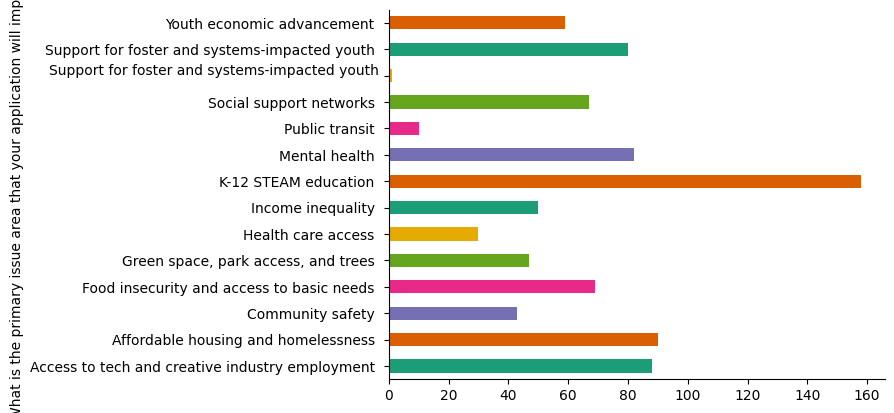

In [ ]:
# Group df_2024 by primary issue
df_2024.groupby('What is the primary issue area that your application will impact?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Concat All Datasets and Analyze Stats

In [ ]:
# Concat all dataframes
directory = '/content/drive/MyDrive/My Goldhirsh Data'
dfs = []
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename)) as f:
            data = json.load(f)

            # Convert to DataFrame, assuming the JSON structure is tabular
            df = pd.json_normalize(data)
            dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
print(df_combined.shape)
df_combined.head()

(3989, 132)


,title,slug,yearSubmitted,organization,summary,goal,projectRanking,How will your project benefit Los Angeles?,What would success look like in the year 2050 regarding your indicator?,Please identify any partners or collaborators who will work with you on this project.,...,What is the need you’re responding to?,Why is this project important to the work of your organization?​,Please describe the broader impact of your proposal.,Which of the LEARN metrics will your submission impact?​,Which of the LIVE metrics will your submission impact?​,Which of the CREATE metrics will your submission impact?​,Has your proposal changed due to COVID-19?,Which of the CONNECT metrics will your submission impact?​,Approximately how many people will be impacted by this proposal?,Why is this project important to the work of your organization?
0,BelongLA — Engaging Angelenos to connect share...,2013/belongla-engaging-angelenos-to-connect-sh...,2013,Children's Bureau of Southern California,How do you belong? Belonging is the deepest se...,None,Submitted,The pioneering work of Belong with its develop...,Success in 2050 for Social Connectedness would...,Children’s Bureau has engaged 75 public and pr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dodgeball Prosperity and the Common Good,2013/dodgeball-prosperity-and-the-common-good,2013,Eagle Rock Yacht Club,"During our journey, The Yacht Club has seeming...",None,Submitted,We believe a more physically active Los Angele...,"By 2050, we hope that there will be a drastic ...",LA Department of Recreation & Parks:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dream Resource Center,2013/dream-resource-center,2013,UCLA Labor Center,"This year, the Dream Resource Center (DRC), wi...",None,Submitted,Los Angeles will benefit from higher rates of ...,"In 2050, Los Angeles will embrace the rich imm...",Los Angeles Unified School District; United We...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Craft Services,2013/craft-services,2013,Participlay,A mobile arts and crafting unit that visits ta...,None,Submitted,"The fact is that the arts foster creativity, i...","Success would look like that schools, families...","LA's Best After School Enrichment, Mario Davila",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Backyard Homes: Sustainable Flexible Affordabl...,2013/backyard-homes-sustainable-flexible-affor...,2013,cityLAB-UCLA,"cityLAB proposes to build, study, and publicly...",None,Submitted,Backyard Homes will benefit Los Angeles by mak...,"In 2050, if Backyard Homes had spread to just ...",The project will be undertaken by the internat...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df_combined.columns.tolist())

['title', 'slug', 'yearSubmitted', 'organization', 'summary', 'goal', 'projectRanking', 'How will your project benefit Los Angeles?', 'What would success look like in the year 2050 regarding your indicator?', 'Please identify any partners or collaborators who will work with you on this project.', 'What are some of your organization’s most important achievements to date?', 'Please explain how you will evaluate your project. How will you measure success?', 'What two lessons have informed your solution or project?', 'Explain how implementing your project within the next twelve months is an achievable goal.', 'Please list at least two major barriers/challenges you anticipate. What is your strategy for ensuring a successful implementation?', 'Please describe yourself.', 'What will you do to implement this idea/project?', 'Which area(s) of LA does your project benefit?', 'Whom will your project benefit?', 'Please explain how you will evaluate your project.', 'In one sentence, please describe

In [ ]:
df_combined['What is the primary issue area that your application will impact?'].unique()

array([nan, 'Green Space, Park Access, and Trees',
       'Housing and Homelessness',
       'Access to Creative Industry Employment (sponsored by Snap Foundation)',
       'BIPOC- and Women-Owned Businesses', 'K-12 STEAM Education',
       'Support for Foster and Systems-Impacted Youth',
       'Income Inequality', 'Community Safety', 'Climate and Environment',
       'Immigrant and Refugee Support',
       'Youth Economic Advancement (sponsored by Funding Partner, TBA)',
       'Public Transit', 'Mental health ', 'Social support networks ',
       'Youth economic advancement ', 'Income inequality ',
       'Access to tech and creative industry employment ',
       'K-12 STEAM education ',
       'Support for foster and systems-impacted youth ',
       'Affordable housing and homelessness ', 'Health care access ',
       'Food insecurity and access to basic needs ',
       'Green space, park access, and trees ', 'Community safety ',
       'Public transit ',
       'Support for foster

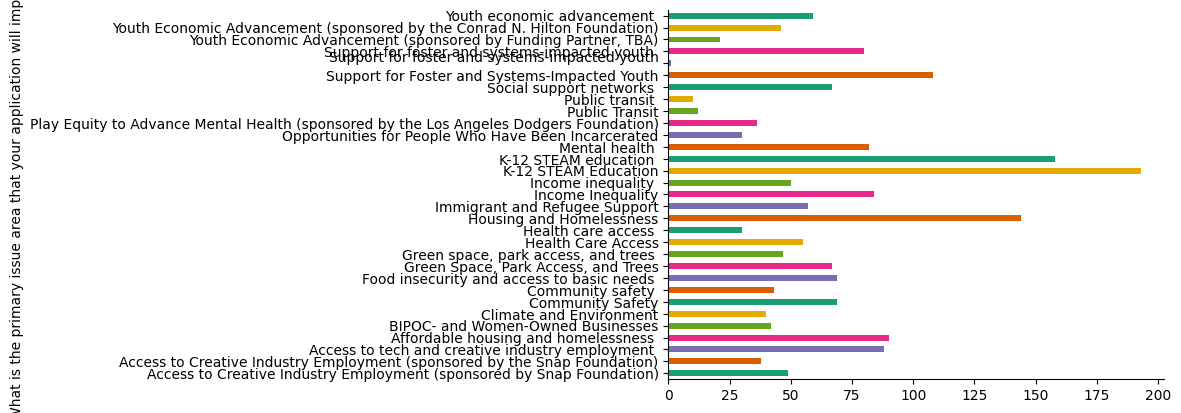

In [ ]:
# Group by primary issue
df_combined.groupby('What is the primary issue area that your application will impact?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

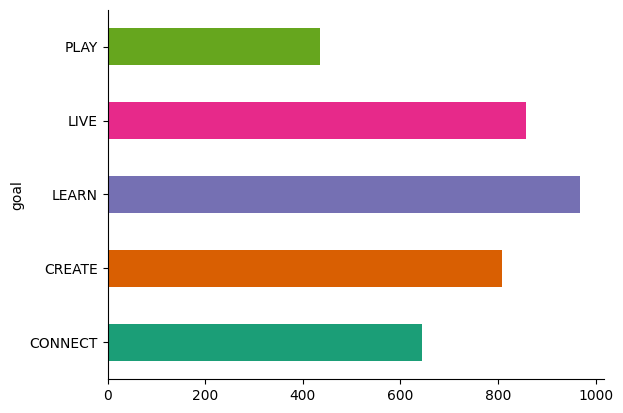

In [ ]:
# Group by Goal
df_combined.groupby('goal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

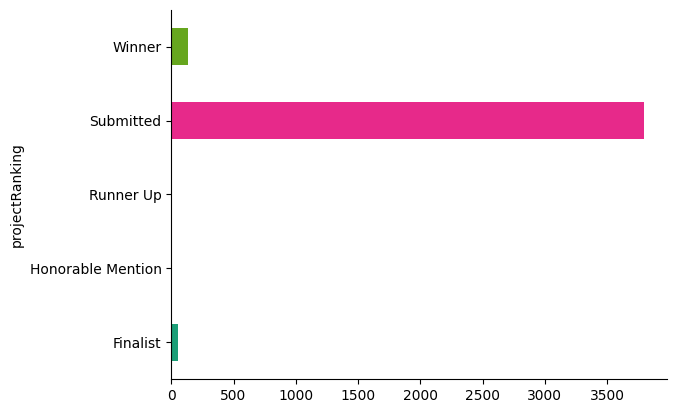

In [ ]:
# Group by project ranking
df_combined.groupby('projectRanking').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# To check for missing values
missing_values_per_column = df_combined.isnull().sum()
print(missing_values_per_column)


title                                                                  0
slug                                                                   0
yearSubmitted                                                          0
organization                                                           0
summary                                                                2
                                                                    ... 
Which of the CREATE metrics will your submission impact?​           3944
Has your proposal changed due to COVID-19?                          3964
Which of the CONNECT metrics will your submission impact?​          3922
Approximately how many people will be impacted by this proposal?    3988
Why is this project important to the work of your organization?     3988
Length: 132, dtype: int64


In [ ]:
# To see top 10 most/least common words

# Combine all text data from the selected column into a single string
from collections import Counter
import re
all_text = 'summary'.join(df['summary'])

# Tokenize the text into words (lowercase and remove non-alphabetic characters)
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Convert the counter object to a DataFrame for easy sorting
word_count_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by the frequency count
word_count_df = word_count_df.sort_values(by='count', ascending=False)

# Top 10 most common words
print("Top 10 Most Common Words:")
print(word_count_df.head(30))

# Top 10 least common words
print("\nTop 10 Least Common Words:")
print(word_count_df.tail(30))

Top 10 Most Common Words:
          word  count
9          and   2369
12          to   1712
53         the   1441
1           of    933
28          in    842
4            a    766
6          for    575
14        with    475
33        will    413
67         our    398
8        youth    391
3           is    353
10       their    336
5      program    335
79        that    308
54          we    300
192  community    292
124         by    243
86           s    236
227         as    211
296    support    206
16     through    205
41    students    204
562     health    202
18          on    195
111        are    187
304         la    185
257    angeles    164
256        los    163
461       this    156

Top 10 Least Common Words:
                     word  count
3570          schoolyards      1
3571      transformations      1
3572          summaryheal      1
3577             goodwill      1
3578                  gsc      1
3583                taken      1
793        revitalization      1
